## hw_8

__Задача 1__

_Используя данные о хоккеистах (скачать можно [здесь](https://habr.com/ru/post/301340/)), проверьте, является ли среди хоккеистов из Финляндии, Норвегии и Дании значимым отличие роста. В качестве ответа запишите 1, если является, и 0 иначе._

_Подсказка: не забудьте предобработать данные (например, дублируются ли данные о конкретных игроках?)._

In [66]:
import pandas as pd

In [67]:
df = pd.read_csv('hockey_players_1.csv', sep=',')
df

,year,country,no,name,position,side,height,weight,birth,club,age,cohort,bmi
0,2001,RUS,10,tverdovsky oleg,D,L,185,84.0,1976-05-18,anaheim mighty ducks,24.952772,1976,24.543462
1,2001,RUS,2,vichnevsky vitali,D,L,188,86.0,1980-03-18,anaheim mighty ducks,21.119781,1980,24.332277
2,2001,RUS,26,petrochinin evgeni,D,L,182,95.0,1976-02-07,severstal cherepovetal,25.229295,1976,28.680111
3,2001,RUS,28,zhdan alexander,D,R,178,85.0,1971-08-28,ak bars kazan,29.675565,1971,26.827421
4,2001,RUS,32,orekhovsky oleg,D,R,175,88.0,1977-11-03,dynamo moscow,23.490760,1977,28.734694
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6287,2016,USA,71,foligno nick,F,L,183,95.0,1987-10-31,columbus blue jackets,28.501027,1987,28.367524
6288,2016,USA,72,vatrano frank,F,L,178,98.0,1994-03-14,boston bruins,22.132786,1994,30.930438
6289,2016,USA,1,kinkaid keith,G,L,191,88.0,1989-07-04,new jersey devils,26.825462,1989,24.122146
6290,2016,USA,30,condon mike,G,L,188,89.0,1990-04-27,montreal canadiens,26.012320,1990,25.181077


In [68]:
df['country'].unique()

array(['RUS', 'AUT', 'BLR', 'CAN', 'CZE', 'FIN', 'GER', 'ITA', 'JPN',
       'LAT', 'NOR', 'SUI', 'SVK', 'SWE', 'UKR', 'USA', 'POL', 'SLO',
       'DEN', 'FRA', 'KAZ', 'HUN'], dtype=object)

In [73]:
df_Scand = df.loc[(df.country == 'NOR') | (df.country == 'FIN') | (df.country == 'DEN')]
df_Scand

,year,country,no,name,position,side,height,weight,birth,club,age,cohort,bmi
120,2001,FIN,2,kiprusoff marko,D,R,184,89.0,1972-06-06,ehc kloten,28.900753,1972,26.287807
121,2001,FIN,3,nummelin petteri,D,L,178,83.0,1972-11-25,columbus blue jackets,28.429843,1972,26.196187
122,2001,FIN,4,timonen kimmo,D,L,178,88.0,1975-03-18,nashville predators,26.121834,1975,27.774271
123,2001,FIN,40,niemi antti-jussi,D,L,185,87.0,1977-09-22,anaheim mighty ducks,23.605749,1977,25.420015
124,2001,FIN,5,salo sami,D,R,192,99.0,1974-09-02,ottawa senators,26.661191,1974,26.855469
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6188,2016,NOR,8,trettenes mathias,F,L,179,76.0,1993-11-08,stavanger oilers,22.477755,1993,23.719609
6189,2016,NOR,93,valkvae olsen thomas,F,R,186,88.0,1993-05-18,frisk asker,22.954141,1993,25.436467
6190,2016,NOR,30,haugen lars,G,L,185,83.0,1987-03-19,farjestad karlstad,29.119781,1987,24.251278
6191,2016,NOR,31,volden lars,G,L,190,95.0,1992-07-26,rogle angelholm,23.764545,1992,26.315789


In [74]:
df_Scand_cl = df_Scand.drop(['year', 'no', 'position', 'club', 'age', 'cohort'], axis=1)
df_Scand_cl

,country,name,side,height,weight,birth,bmi
120,FIN,kiprusoff marko,R,184,89.0,1972-06-06,26.287807
121,FIN,nummelin petteri,L,178,83.0,1972-11-25,26.196187
122,FIN,timonen kimmo,L,178,88.0,1975-03-18,27.774271
123,FIN,niemi antti-jussi,L,185,87.0,1977-09-22,25.420015
124,FIN,salo sami,R,192,99.0,1974-09-02,26.855469
...,...,...,...,...,...,...,...
6188,NOR,trettenes mathias,L,179,76.0,1993-11-08,23.719609
6189,NOR,valkvae olsen thomas,R,186,88.0,1993-05-18,25.436467
6190,NOR,haugen lars,L,185,83.0,1987-03-19,24.251278
6191,NOR,volden lars,L,190,95.0,1992-07-26,26.315789


In [81]:
df_Scand_cl = pd.DataFrame.drop_duplicates(df_Scand_cl)
df_Scand_cl

,country,name,side,height,weight,birth,bmi
120,FIN,kiprusoff marko,R,184,89.0,1972-06-06,26.287807
121,FIN,nummelin petteri,L,178,83.0,1972-11-25,26.196187
122,FIN,timonen kimmo,L,178,88.0,1975-03-18,27.774271
123,FIN,niemi antti-jussi,L,185,87.0,1977-09-22,25.420015
124,FIN,salo sami,R,192,99.0,1974-09-02,26.855469
...,...,...,...,...,...,...,...
6188,NOR,trettenes mathias,L,179,76.0,1993-11-08,23.719609
6189,NOR,valkvae olsen thomas,R,186,88.0,1993-05-18,25.436467
6190,NOR,haugen lars,L,185,83.0,1987-03-19,24.251278
6191,NOR,volden lars,L,190,95.0,1992-07-26,26.315789


In [86]:
df_NOR = df_Scand_cl.loc[(df_Scand_cl.country == 'NOR')]
df_FIN = df_Scand_cl.loc[(df_Scand_cl.country == 'FIN')]
df_DEN = df_Scand_cl.loc[(df_Scand_cl.country == 'DEN')]

In [101]:
# Значения роста для хоккеистов по странам
y_NOR = df_NOR.height
y_FIN = df_FIN.height
y_DEN = df_DEN.height

In [100]:
# Количество хоккеистов по странам
n_NOR = df_NOR.shape[0]
n_FIN = df_FIN.shape[0]
n_DEN = df_DEN.shape[0]
n_Scand = df_Scand_cl.shape[0]

Действовать будем по схеме:

__1) Найдем суммы__ $$SS_b = \displaystyle\sum_{i=1}^k \left( \overline{Y_i} - \overline{Y} \right)^2 n_i, \:\:
SS_w = \displaystyle\sum_{i=1}^k \displaystyle\sum_{j=1}^{n_i} \left( y_{ij} - \overline{Y_i} \right)^2,$$


__2) по SS вычислим соответствующие несмещённые оценки дисперсий:__
$$\sigma_b^2 = \dfrac{SS_b}{k - 1}, \:\: \sigma_w^2 = \dfrac{SS_w}{n - k}$$

__3) Вычислим статистику для проверки гипотезы $H_0$:__
$$F = \dfrac{\sigma_b^2}{\sigma_w^2}$$

__4) Для статистики $F$ которая имеет распределение Фишера с параметрами $k_1 = k - 1$, $k_2 = n - k$, вычислим критическую область:__
$$\Omega_\alpha = \left( t_{1 - \alpha, \: k_1, k_2}, \infty \right),$$
где $t_{x, \: k_1, k_2}$ — квантиль порядка $x$ для распределения Фишера с параметрами $k_1$, $k_2$.

In [33]:
import numpy as np

In [102]:
y1 = y_NOR
y2 = y_FIN
y3 = y_DEN

n1 = n_NOR
n2 = n_FIN
n3 = n_DEN

n1, n2, n3

(190, 268, 190)

Выборочные средние по каждой группе:

In [103]:
y1_mean = y1.mean()
y2_mean = y2.mean()
y3_mean = y3.mean()

y1_mean, y2_mean, y3_mean

(183.00526315789475, 184.26865671641792, 184.16315789473686)

Видно, что рост немногоотличается. Проверим статистическую значимость этого отличия. 

Соберём все значения заработных плат в один массив:

In [109]:
y_mean = df_Scand_cl.height.mean()
print(f'Средний рост по выборке скандинавских хлопцев {y_mean}')

Средний рост по выборке скандинавских хлопцев 183.8672839506173


__Найдём значения $SS_b$ и $SS_w$:__
$$SS_b = \displaystyle\sum_{i=1}^k \left( \overline{Y_i} - \overline{Y} \right)^2 n_i, \:\:
SS_w = \displaystyle\sum_{i=1}^k \displaystyle\sum_{j=1}^{n_i} \left( y_{ij} - \overline{Y_i} \right)^2,$$

In [110]:
SS_b = n1 * (y1_mean - y_mean) ** 2 + n2 * (y2_mean - y_mean) ** 2 + n3 * (y3_mean - y_mean) ** 2

SS_w = ((y1 - y1_mean) ** 2).sum() + ((y2 - y2_mean) ** 2).sum() + ((y3 - y3_mean) ** 2).sum()

SS_b, SS_w

(200.99286122991404, 16037.593558523175)

Запишем оценки дисперсий:

По этим значениям вычисляются соответствующие несмещённые оценки дисперсий:
$$\sigma_b^2 = \dfrac{SS_b}{k - 1}, \:\: \sigma_w^2 = \dfrac{SS_w}{n - k}$$


In [111]:
k = 3
n = n1 + n2 + n3

k1 = k - 1
k2 = n - k

sigma2_b = SS_b / k1
sigma2_w = SS_w / k2

sigma2_b, sigma2_w

(100.49643061495702, 24.864486137245233)

Итак, статистика для проверки гипотезы $H_0$:
$$F = \dfrac{\sigma_b^2}{\sigma_w^2}$$

In [112]:
F = sigma2_b / sigma2_w
F

4.041765836633178

Зафиксируем уровень значимости $\alpha = 0.05$. Для него найдём нужный нам квантиль:

In [113]:
from scipy import stats

In [114]:
alpha = 0.05

t = stats.f.ppf(1 - alpha, k1, k2)
t

3.009689272861105

Итак, наша критическая область имеет вид:
$$\Omega_\alpha = \left( 3.009, \infty \right)$$

In [115]:
from matplotlib import pyplot as plt

plt.style.use('seaborn-whitegrid')
%config InlineBackend.figure_formats = ['svg']

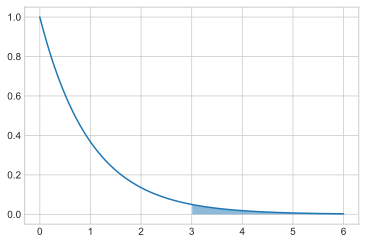

In [116]:
ox = np.linspace(0, 6, 500)
oy = stats.f.pdf(ox, k1, k2)

ox_right = np.linspace(t, 6, 100)
oy_right = stats.f.pdf(ox_right, k1, k2)

plt.plot(ox, oy)
plt.fill_between(ox_right, oy_right, alpha=0.5)

Значение статистики попало в критическую область, поэтому заключаем, что отличие среднего роста действительно является статистически значимым.

Штатными средствами `scipy` это будет аналогично:

In [117]:
stats.f_oneway(y1, y2, y3)

F_onewayResult(statistic=4.041765836633153, pvalue=0.018013234454267744)

In [121]:
# Для bmi:
y1_bmi = df_NOR.bmi
y2_bmi = df_FIN.bmi
y3_bmi = df_DEN.bmi

In [122]:
stats.f_oneway(y1_bmi, y2_bmi, y3_bmi)

F_onewayResult(statistic=18.43068796432054, pvalue=1.6444428343622025e-08)

Ответ: для роста и для 